In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

Generating the Dataset - defining function getData based on equation 1

In [2]:
def getData(N, sigma):
    X = np.random.uniform(0, 1, N)
    Z = np.random.normal(0, np.sqrt(sigma), N)
    Y = np.cos(2 * np.pi * X) + Z
    return X, Y

Computing Mean Squared Error - defining Function getMSE.

In [3]:
def getMSE(Y, Y_pred):
    mse = np.mean((Y_pred - Y) ** 2)
    return mse

Fiting Data to Polynomial - defining Function fitData to get Ein and Eout with a weight decay regularization(L2)

In [4]:
import numpy as np

def fitData_L2Regularized(X_train, Y_train, X_test, Y_test, d, learning_rate, num_iterations, weight_decay):
    coeffs = np.random.randn(d + 1)
        
    for _ in range(num_iterations):
        
        Y_pred = np.polyval(coeffs, X_train)
        gradient = np.dot(X_train ** np.arange(d + 1)[:, np.newaxis], (Y_pred - Y_train)) / len(X_train)
        
        # Add L2 regularization and updating coefficents
        regularization_term = 2 * weight_decay * coeffs
        gradient += regularization_term
        coeffs -= learning_rate * gradient
        
    # Calculate training and testing error
    Ein = np.mean((Y_train - np.polyval(coeffs, X_train)) ** 2)
    Eout = np.mean((Y_test - np.polyval(coeffs, X_test)) ** 2)
    
    return coeffs, Ein, Eout

In [ ]:
Experiment - defining the function experiment

In [6]:
def experiment_RegularizedL2(N, d, sigma, num_trials, learning_rate, num_iterations, weight_decay):
    Ein_avg = 0
    Eout_avg = 0
    weight_decay = 0.1
    
    for _ in range(num_trials):
        #splitting testing and training set.
        X_train, Y_train = getData(N, sigma)
        X_test, Y_test = getData(2000, sigma)
        
        #Computing coeffs, Ein & Eout for test and train data set and calculating Ein & Eout
        coeffs, Ein, Eout = fitData_L2Regularized(X_train, Y_train, X_test, Y_test, d, learning_rate, num_iterations, weight_decay)
        Ein_avg += Ein
        Eout_avg += Eout
    
    #Average of Ein & Eout
    Ein_avg /= num_trials
    Eout_avg /= num_trials
    
    return Ein_avg, Eout_avg

Running the experiment for all possible values of N, d and sigma.

In [7]:
N_values = [2, 5, 10, 20, 50, 100, 200]
degree_values = [1, 2, 4, 8, 16, 32, 64]
sigma_values = [0.05, 0.2]
num_trials = 50
learning_rate = 0.01
num_iterations = 300
weight_decay = 0.1
result = []
result_data={}

for N in N_values:
    for d in degree_values:
        for sigma in sigma_values:
            variance = sigma**2
            Ein_avg, Eout_avg = experiment_RegularizedL2(N, d, variance, num_trials,  learning_rate, num_iterations, weight_decay)
            result.append((N, d, sigma, Ein_avg, Eout_avg))
            result_data[(N,d,sigma)] = (Ein_avg, Eout_avg)

# Writing dataset into a csv and printing.
csv_filename = "experiment_results_L2.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['N', 'd', 'sigma', 'Ein', 'Eout'])
    for row in result:
        writer.writerow(row)
        print(row)

(2, 1, 0.05, 0.3352038595016122, 0.7866865393351696)
(2, 1, 0.2, 0.3245754942229256, 0.7694278478179083)
(2, 2, 0.05, 0.34908966577668915, 0.9247458808380534)
(2, 2, 0.2, 0.4783749836991356, 0.8627591168481707)
(2, 4, 0.05, 0.5777073951090446, 0.9961050914740407)
(2, 4, 0.2, 0.5373392374786738, 1.1330759350430295)
(2, 8, 0.05, 0.4891044246206447, 1.1942208588464025)
(2, 8, 0.2, 0.6864642421140608, 1.3136794477932845)
(2, 16, 0.05, 0.7354533355818961, 1.4818844614656705)
(2, 16, 0.2, 0.6998047113664717, 1.4086069194017872)
(2, 32, 0.05, 0.6759413917861751, 1.3348581358975744)
(2, 32, 0.2, 0.9102379492718718, 1.6624262694447374)
(2, 64, 0.05, 0.7447051006714959, 2.014229018217377)
(2, 64, 0.2, 1.0731573994506116, 2.6850167135768586)
(5, 1, 0.05, 0.4701013953181924, 0.6538229020695474)
(5, 1, 0.2, 0.513003695047707, 0.6534451487477743)
(5, 2, 0.05, 0.6012089452496915, 0.7117373070087905)
(5, 2, 0.2, 0.5007255291572213, 0.7568189671923605)
(5, 4, 0.05, 0.6368066283928875, 0.845419842960429

Selecting N and d values for plotting

In [8]:
print(result_data[2,16,0.05])
selected_N_values = [2,50,200]
selected_d_values = [1,8,64]

(0.7354533355818961, 1.4818844614656705)


Obtaing Ein & Eout for selected N values

In [9]:
result_N_values = {}
for N_val in selected_N_values:
    for d in degree_values:
        for sigma in sigma_values:
            #result_N_values.append((N, d, sigma, Ein_avg, Eout_avg))
            result_N_values[(N_val,d,sigma)]= result_data[(N_val,d,sigma)]
#print(result_N_values)

Plotting Ein & Eout for selected N values as a function of d.

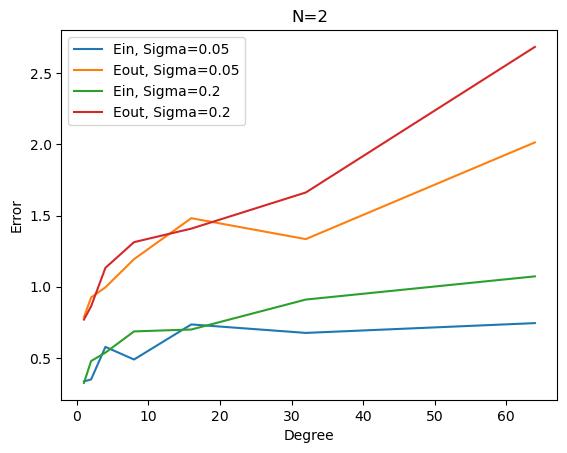

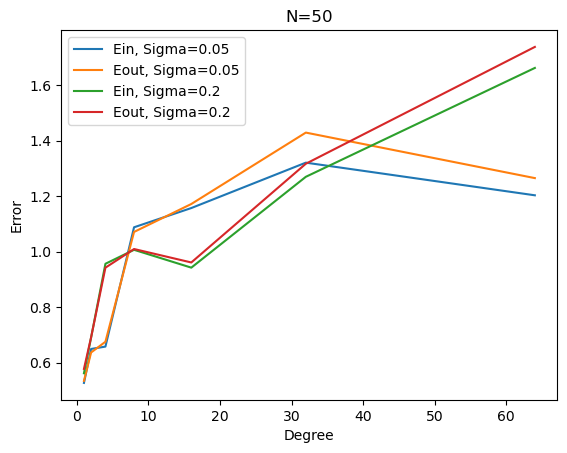

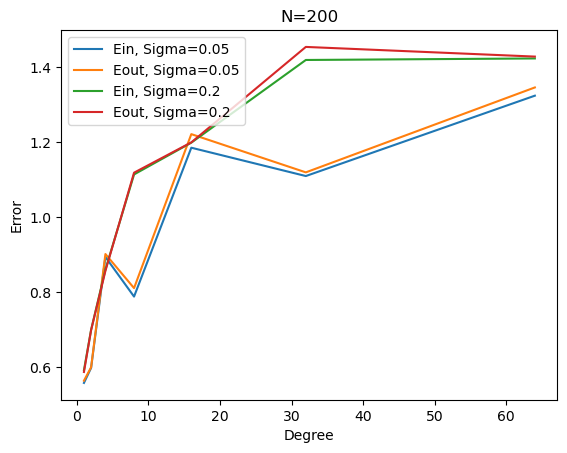

In [13]:
for N in selected_N_values:
    plt.figure()
    for sigma in sigma_values:
        Ein_vals = [result_N_values[val][0] for val in result_N_values if val[2] == sigma and val[0]==N]
        #print(Ein_vals)
        Eout_vals = [result_N_values[val][1] for val in result_N_values if val[2] == sigma and val[0]==N]
        #print(Eout_vals)
        d = [val[1] for val in result_N_values if val[2] == sigma and val[0]==N]
        #print(d)
        plt.title('N={}'.format(N))
        plt.xlabel("Degree")
        plt.ylabel("Error")
        plt.plot(d, Ein_vals, label="Ein, Sigma={}".format(sigma))
        plt.plot(d, Eout_vals, label="Eout, Sigma={}".format(sigma))
        leg = plt.legend(loc='upper left')

Obtaing Ein & Eout for selected d values

In [11]:
result_d_values = {}
for d_val in selected_d_values:
    for N in N_values:
        for sigma in sigma_values:
            result_d_values[(N,d_val,sigma)] = result_data[(N,d_val,sigma)]
#print(result_d_values)

Plotting Ein & Eout for selected d values as a function of N.

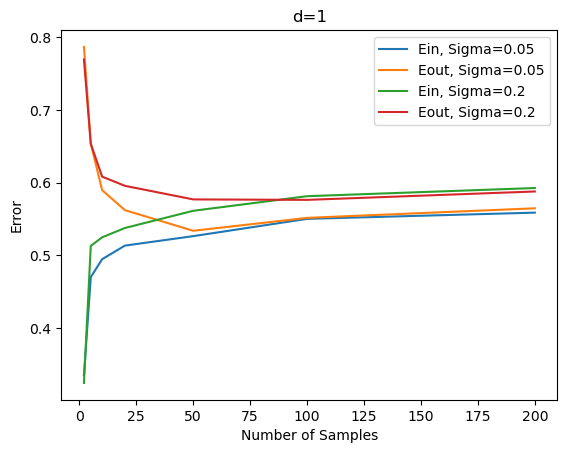

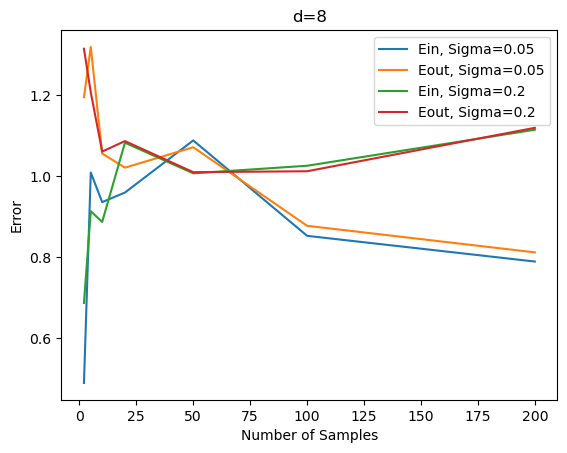

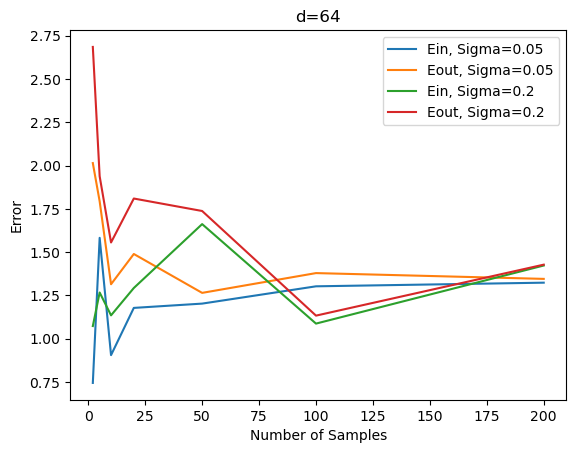

In [12]:
for d in selected_d_values:
    plt.figure()
    for sigma in sigma_values:
        Ein_vals = [result_d_values[val][0] for val in result_d_values if val[2] == sigma and val[1]==d]
        #print(Ein_vals)
        Eout_vals = [result_d_values[val][1] for val in result_d_values if val[2] == sigma and val[1]==d]
        #print(Eout_vals)
        N = [val[0] for val in result_d_values if val[2] == sigma and val[1]==d]
        #print(d)
        plt.title('d={}'.format(d))
        plt.xlabel("Number of Samples")
        plt.ylabel("Error")
        plt.plot(N, Ein_vals, label="Ein, Sigma={}".format(sigma))
        plt.plot(N, Eout_vals, label="Eout, Sigma={}".format(sigma))
        leg = plt.legend(loc='upper right')